In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [6]:
# Load the Boston Housing dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1],
data.iloc[:, -1], test_size=0.2, random_state=42)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,
header=None)
data = np.hstack([raw_df.values[::2, :],
raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [7]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Define the model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1)])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 0s 14ms/step - loss: 598.1241 - val_loss: 526.0145
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 569.2527 - val_loss: 498.3904
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 536.1540 - val_loss: 465.6559
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 495.9185 - val_loss: 422.9831
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 444.4587 - val_loss: 369.9552
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 379.6695 - val_loss: 308.7876
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 310.6721 - val_loss: 241.1732
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 238.7193 - val_loss: 177.3804
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 176.6054 - val_loss: 125.8877
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss

11/11 [==============================] - 0s 4ms/step - loss: 10.2373 - val_loss: 15.2496
Epoch 82/100
11/11 [==============================] - 0s 7ms/step - loss: 10.1547 - val_loss: 15.1566
Epoch 83/100
11/11 [==============================] - 0s 6ms/step - loss: 10.4380 - val_loss: 14.6699
Epoch 84/100
11/11 [==============================] - 0s 6ms/step - loss: 10.2812 - val_loss: 14.9524
Epoch 85/100
11/11 [==============================] - 0s 4ms/step - loss: 10.0514 - val_loss: 15.4991
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 10.2029 - val_loss: 15.1214
Epoch 87/100
11/11 [==============================] - 0s 4ms/step - loss: 9.9803 - val_loss: 15.3613
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 9.8504 - val_loss: 15.3907
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 9.8633 - val_loss: 15.3293
Epoch 90/100
11/11 [==============================] - 0s 4ms/step - loss: 9.9281 - val_loss: 16.48

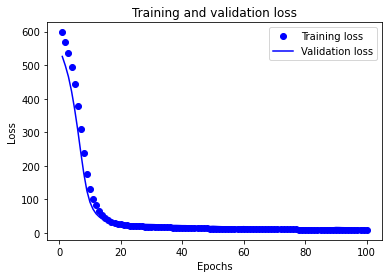

In [10]:
# Visualize the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


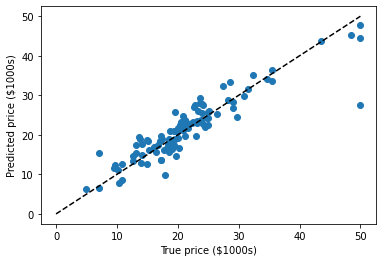

In [12]:
# Visualize the linear regression graph
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()